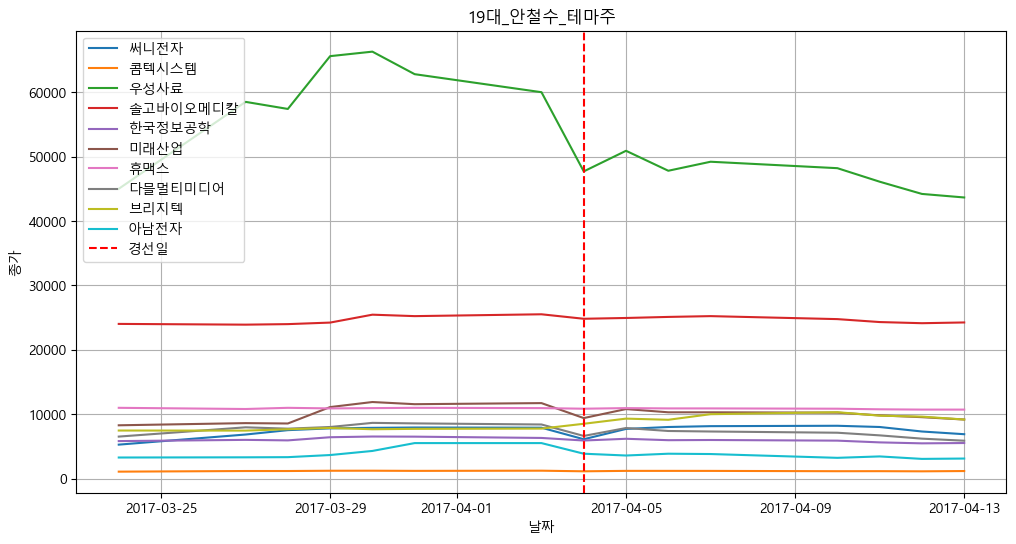

In [5]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

start_date = '2017-03-24' #경선확정일 - 10
end_date = '2017-04-13' #경선확정일 + 10

thema1 = fdr.DataReader('004770', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('031820', start=start_date, end=end_date) #테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
thema3 = fdr.DataReader('006980', start=start_date, end=end_date)
thema4 = fdr.DataReader('043100', start=start_date, end=end_date)
thema5 = fdr.DataReader('039740', start=start_date, end=end_date)
thema6 = fdr.DataReader('025560', start=start_date, end=end_date)
thema7 = fdr.DataReader('115160', start=start_date, end=end_date)
thema8 = fdr.DataReader('093640', start=start_date, end=end_date)
thema9 = fdr.DataReader('064480', start=start_date, end=end_date)
thema10 = fdr.DataReader('008700', start=start_date, end=end_date)


thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']
thema['thema9'] = thema9['Close']
thema['thema10'] = thema10['Close']
#(1)에 추가했을 경우 이 부분도 추가해주세요


plt.figure(figsize=(12, 6))
plt.plot(thema.index, thema['thema1'], label='써니전자')
plt.plot(thema.index, thema['thema2'], label='콤텍시스템')
plt.plot(thema.index, thema['thema3'], label='우성사료')
plt.plot(thema.index, thema['thema4'], label='솔고바이오메디칼')
plt.plot(thema.index, thema['thema5'], label='한국정보공학')
plt.plot(thema.index, thema['thema6'], label='미래산업')
plt.plot(thema.index, thema['thema7'], label='휴맥스')
plt.plot(thema.index, thema['thema8'], label='다믈멀티미디어')
plt.plot(thema.index, thema['thema9'], label='브리지텍')
plt.plot(thema.index, thema['thema10'], label='아남전자')
#(1)에 추가했을 경우 이 부분도 추가해주세요

#경선 일에 빨간 점선 줄
plt.axvline(x=pd.to_datetime('2017-04-04'), color='red', linestyle='--', label='경선일') #경선일을 수정하려면 datatime변수 수정해주시면 됩니다.

plt.xlabel('날짜')
plt.ylabel('종가')
plt.title('19대_안철수_테마주')
plt.legend()
plt.grid(True)
plt.show()


# 종목 코드 → 종목명 매핑
label_dict = {
    'thema1': '써니전자',
    'thema2': '콤텍시스템',
    'thema3': '우성사료',
    'thema4': '솔고바이오메디칼',
    'thema5': '한국정보공학',
    'thema6': '미래산업',
    'thema7': '휴맥스',
    'thema8': '다믈멀티미디어',
    'thema9': '브리지텍',
    'thema10': '아남전자'
}

# 열 이름을 종목명으로 교체
thema_renamed = thema.rename(columns=label_dict)

# CSV로 저장 (index에 날짜 포함됨)
thema_renamed.to_csv('19대_안철수_테마주_일별종가_단기.csv', encoding='utf-8-sig')

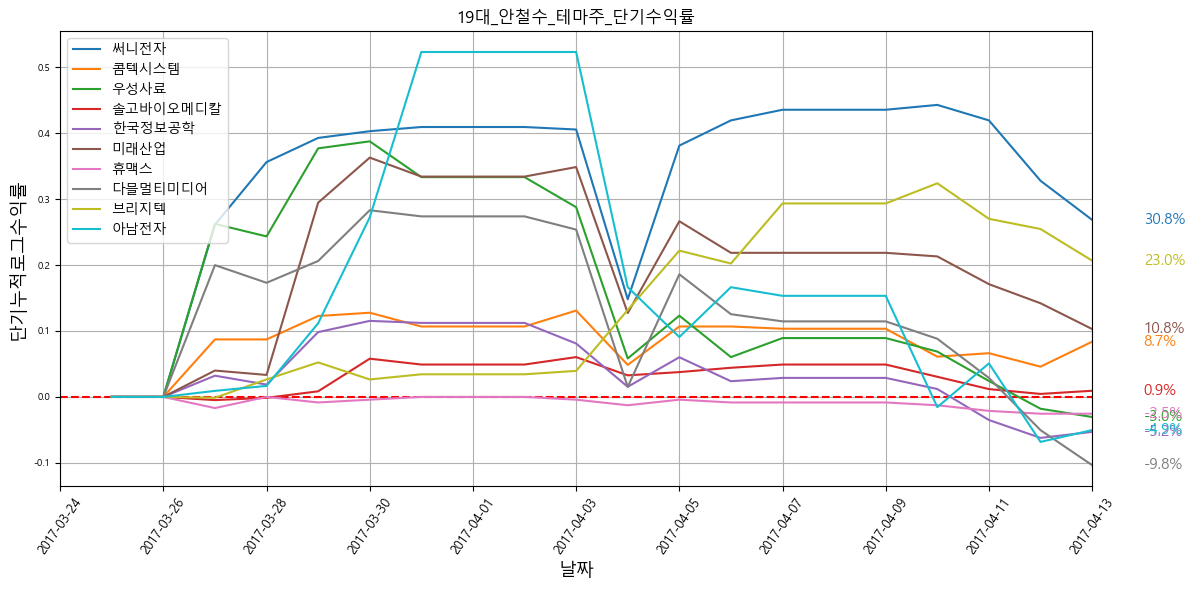

In [6]:
# 단기 수익률
# 누적 로그 수익률 계산
daily = thema.resample('d').last()
d_df = daily.pct_change()
daily_log_returns = d_df.apply(lambda x: np.log(1 + x)).cumsum() #로그 누적 수익률

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.axhline(y=0.0, color='red', linestyle='--')  # 수익률 0 기준선

# 종목 컬럼과 라벨
columns = ['thema1', 'thema2', 'thema3', 'thema4', 'thema5','thema6', 'thema7', 'thema8', 'thema9', 'thema10']
labels = ['써니전자', '콤텍시스템', '우성사료', '솔고바이오메디칼', '한국정보공학','미래산업', '휴맥스', '다믈멀티미디어', '브리지텍', '아남전자']  # 이 부분 수정해주세요.
colors = plt.cm.tab10.colors

for i, (col, label) in enumerate(zip(columns, labels)):
    plt.plot(daily_log_returns.index, daily_log_returns[col], label=label, color=colors[i % 10])

    last_date = daily_log_returns.index[-1]
    log_return = daily_log_returns[col].iloc[-1]
    normal_return = np.exp(log_return) - 1  # 로그 수익률을 보기 쉽게 다시 일반수익률로 

    plt.text(last_date + pd.Timedelta(days=1),  
             log_return,
             f'{normal_return * 100:.1f}%',   
             fontsize=11,
             va='center',
             ha='left',
             color=colors[i % 10])
    
plt.xlim(daily_log_returns.index[0], daily_log_returns.index[-1]) 

plt.xticks(fontsize=9, rotation=55)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) #몇 일 간격으로 y축에 날짜가 나오게 할지 , 장기의 경우 8일 정도로 하면 좋을듯 합니다.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.yticks(fontsize=7)

plt.xlabel('날짜', fontsize=13)
plt.ylabel('단기누적로그수익률', fontsize=13)
plt.title('19대_안철수_테마주_단기수익률')
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

# 종목 코드 → 종목명 매핑
label_dict = {
    'thema1': '써니전자',
    'thema2': '콤텍시스템',
    'thema3': '우성사료',
    'thema4': '솔고바이오메디칼',
    'thema5': '한국정보공학',
    'thema6': '미래산업',
    'thema7': '휴맥스',
    'thema8': '다믈멀티미디어',
    'thema9': '브리지텍',
    'thema10': '아남전자'
}

# 열 이름을 종목명으로 바꿔 저장
daily_log_returns_named = daily_log_returns.rename(columns=label_dict)

# 누적 로그 수익률 → 일반 수익률로 변환
daily_normal_returns = np.exp(daily_log_returns_named) - 1

# 퍼센트 단위로 변환
daily_normal_returns_percent = daily_normal_returns * 100

# 저장
daily_normal_returns_percent.to_csv('19대_안철수_테마주_단기수익률.csv', encoding='utf-8-sig')

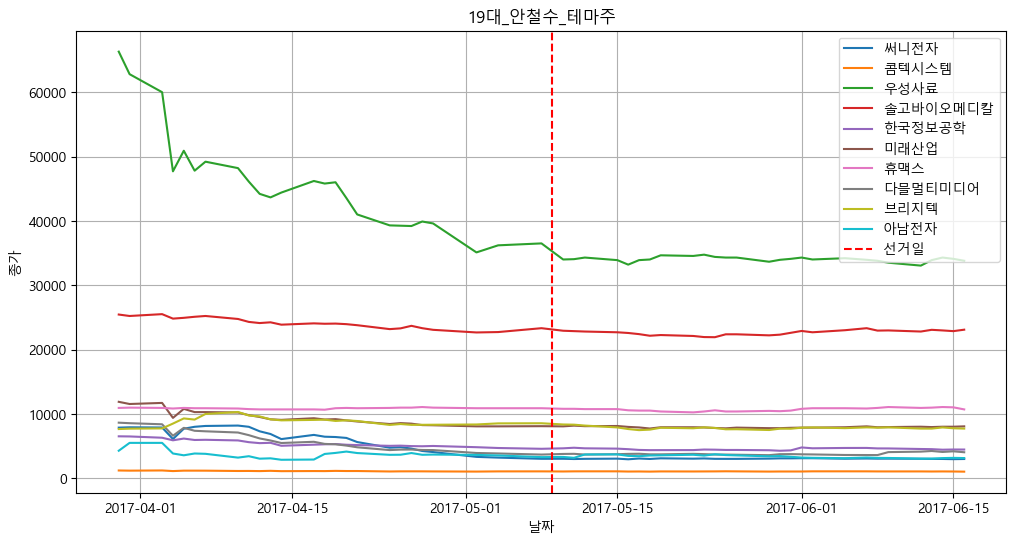

In [7]:
import FinanceDataReader as fdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

start_date = '2017-03-30' #선거날 - 40
end_date = '2017-06-17' # 선거날 +40

thema1 = fdr.DataReader('004770', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('031820', start=start_date, end=end_date) #테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date) 
thema3 = fdr.DataReader('006980', start=start_date, end=end_date)
thema4 = fdr.DataReader('043100', start=start_date, end=end_date)
thema5 = fdr.DataReader('039740', start=start_date, end=end_date)
thema6 = fdr.DataReader('025560', start=start_date, end=end_date)
thema7 = fdr.DataReader('115160', start=start_date, end=end_date)
thema8 = fdr.DataReader('093640', start=start_date, end=end_date)
thema9 = fdr.DataReader('064480', start=start_date, end=end_date)
thema10 = fdr.DataReader('008700', start=start_date, end=end_date)


thema= pd.DataFrame()

thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']
thema['thema9'] = thema9['Close']
thema['thema10'] = thema10['Close']
#(1)에 추가했을 경우 이 부분도 추가해주세요


plt.figure(figsize=(12, 6))
plt.plot(thema.index, thema['thema1'], label='써니전자')
plt.plot(thema.index, thema['thema2'], label='콤텍시스템')
plt.plot(thema.index, thema['thema3'], label='우성사료')
plt.plot(thema.index, thema['thema4'], label='솔고바이오메디칼')
plt.plot(thema.index, thema['thema5'], label='한국정보공학')
plt.plot(thema.index, thema['thema6'], label='미래산업')
plt.plot(thema.index, thema['thema7'], label='휴맥스')
plt.plot(thema.index, thema['thema8'], label='다믈멀티미디어')
plt.plot(thema.index, thema['thema9'], label='브리지텍')
plt.plot(thema.index, thema['thema10'], label='아남전자')
#(1)에 추가했을 경우 이 부분도 추가해주세요

#경선 일에 빨간 점선 줄
plt.axvline(x=pd.to_datetime('2017-05-09'), color='red', linestyle='--', label='선거일') #경선일을 수정하려면 datatime변수 수정해주시면 됩니다.

plt.xlabel('날짜')
plt.ylabel('종가')
plt.title('19대_안철수_테마주')
plt.legend()
plt.grid(True)
plt.show()

# 종목 코드 → 종목명 매핑
label_dict = {
    'thema1': '써니전자',
    'thema2': '콤텍시스템',
    'thema3': '우성사료',
    'thema4': '솔고바이오메디칼',
    'thema5': '한국정보공학',
    'thema6': '미래산업',
    'thema7': '휴맥스',
    'thema8': '다믈멀티미디어',
    'thema9': '브리지텍',
    'thema10': '아남전자'
}

# 열 이름을 종목명으로 변경
thema_named = thema.rename(columns=label_dict)

# CSV 저장
thema_named.to_csv('19대_안철수_테마주_일별종가_장기.csv', encoding='utf-8-sig')

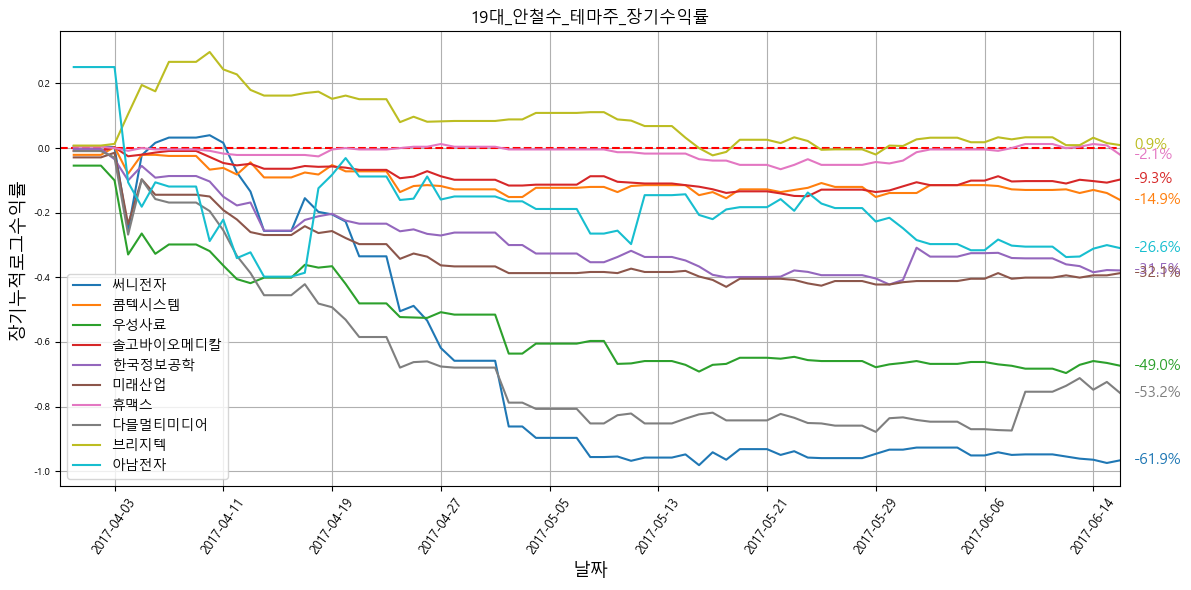

In [8]:
# 장기 수익률
# 누적 로그 수익률 계산
daily = thema.resample('d').last()
d_df = daily.pct_change()
daily_log_returns = d_df.apply(lambda x: np.log(1 + x)).cumsum() #로그 누적 수익률

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.axhline(y=0.0, color='red', linestyle='--')  # 수익률 0 기준선

# 종목 컬럼과 라벨
columns = ['thema1', 'thema2', 'thema3', 'thema4', 'thema5','thema6', 'thema7', 'thema8', 'thema9', 'thema10']
labels = ['써니전자', '콤텍시스템', '우성사료', '솔고바이오메디칼', '한국정보공학','미래산업', '휴맥스', '다믈멀티미디어', '브리지텍', '아남전자']  # 이 부분 수정해주세요.
colors = plt.cm.tab10.colors

for i, (col, label) in enumerate(zip(columns, labels)):
    plt.plot(daily_log_returns.index, daily_log_returns[col], label=label, color=colors[i % 10])

    last_date = daily_log_returns.index[-1]
    log_return = daily_log_returns[col].iloc[-1]
    normal_return = np.exp(log_return) - 1  # 로그 수익률을 보기 쉽게 다시 일반수익률로 

    plt.text(last_date + pd.Timedelta(days=1),  
             log_return,
             f'{normal_return * 100:.1f}%',   
             fontsize=11,
             va='center',
             ha='left',
             color=colors[i % 10])
    
plt.xlim(daily_log_returns.index[0], daily_log_returns.index[-1]) 

plt.xticks(fontsize=9, rotation=55)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=8)) #몇 일 간격으로 y축에 날짜가 나오게 할지 , 장기의 경우 8일 정도로 하면 좋을듯 합니다.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.yticks(fontsize=7)

plt.xlabel('날짜', fontsize=13)
plt.ylabel('장기누적로그수익률', fontsize=13)
plt.title('19대_안철수_테마주_장기수익률')
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

# 종목 코드 → 종목명 매핑
label_dict = {
    'thema1': '써니전자',
    'thema2': '콤텍시스템',
    'thema3': '우성사료',
    'thema4': '솔고바이오메디칼',
    'thema5': '한국정보공학',
    'thema6': '미래산업',
    'thema7': '휴맥스',
    'thema8': '다믈멀티미디어',
    'thema9': '브리지텍',
    'thema10': '아남전자'
}

# 열 이름을 종목명으로 바꾸기
daily_log_named = daily_log_returns.rename(columns=label_dict)

# 일반 수익률(%)로 변환
daily_normal_returns = np.exp(daily_log_named) - 1
daily_normal_returns_percent = daily_normal_returns * 100

# CSV로 저장
daily_normal_returns_percent.to_csv('19대_안철수_테마주_장기수익률.csv', encoding='utf-8-sig')